In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf

In [2]:
gss = h5py.File('gss.hdf5', 'r')

In [3]:
group = gss['gss']
for key in group.keys():
    print(key)

axis0
axis1
block0_items
block0_values
block1_items
block1_values


In [4]:
col1_gss = gss['gss']['block0_items'][()]
col2_gss = gss['gss']['block1_items'][()]
data1_gss = gss['gss']['block0_values'][()]
data2_gss = gss['gss']['block1_values'][()]

tab1 = pd.DataFrame(data1_gss, columns=col1_gss)
tab2 = pd.DataFrame(data2_gss, columns=col2_gss)

gss = pd.concat([tab1, tab2], axis=1)

gss.columns = gss.columns.astype(str)

In [5]:
gss.head()

,age,cohort,educ,realinc,gunlaw,grass,wtssall,year,sex,race
0,26.0,1946.0,18.0,13537.0,2.0,NaN,0.8893,1972,1,1
1,38.0,1934.0,12.0,18951.0,1.0,NaN,0.4446,1972,2,1
2,57.0,1915.0,12.0,30458.0,1.0,NaN,1.3339,1972,1,1
3,61.0,1911.0,14.0,37226.0,1.0,NaN,0.8893,1972,2,1
4,59.0,1913.0,12.0,30458.0,2.0,NaN,0.8893,1972,1,1


In [6]:
educ = gss['educ']

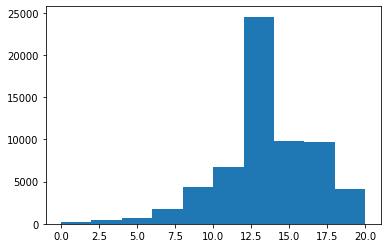

In [7]:
plt.hist(educ.dropna(), label='educ')
plt.show()

In [8]:
pmf_educ = Pmf.from_seq(educ, normalize=False)

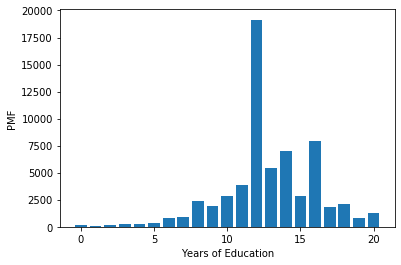

In [9]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of Education')
plt.ylabel('PMF')
plt.show()

In [10]:
pmf_year = Pmf.from_seq(gss['year'], normalize=False)
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


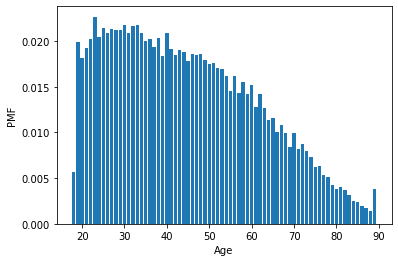

In [11]:
age = gss['age']
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

### Make a CDF

In [12]:
age = gss['age']
cdf_age = Cdf.from_seq(age)

### Calculate the CDF of 30

In [13]:
cdf_age[30]

0.2539137136526389

### Calculate the 75th percentile of income

In [14]:
cdf_income = Cdf.from_seq(gss['realinc'])

In [15]:
percentile_75th = cdf_income.inverse(0.75)
percentile_75th

array(43426.)

In [16]:
percentile_25th = cdf_income.inverse(0.25)
percentile_25th

array(13750.)

In [17]:
iqr = percentile_75th - percentile_25th
iqr

29676.0

### CDF - The distribution of income

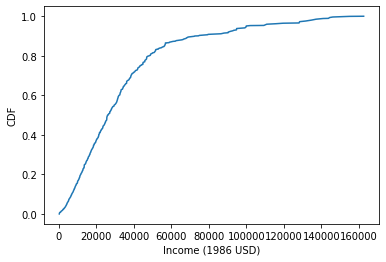

In [18]:
cdf_income.plot()
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

### Extract education levels

In [19]:
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)

### Plot income CDFs

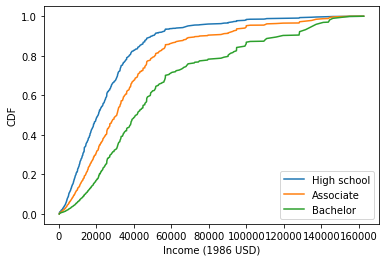

In [20]:
income = gss['realinc']

Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()